In [293]:
from sqlalchemy import create_engine
from sqlalchemy.pool import StaticPool
import pandas as pd
import requests
import json
import re
from math import nan

In [4]:
pwd

'/Users/diegofernandezdelahoz/Downloads'

In [5]:
data = pd.read_csv('./Analisis_DataFrame_proyecto1/clean_data_table.csv')

In [6]:
data['title'].isnull().sum()

3947

In [7]:
data = pd.read_csv('./Analisis_DataFrame_proyecto1/clean_data_table.csv')

#data

#data[data['country_code']=='HK']

group_data = data[['country_l', 'habitat', 'uuid','title']].groupby(['country_l','habitat','title']).count()



group_data

    
group_data['Percentage'] = group_data['uuid'].apply(lambda qtty: str((qtty*100/group_data['uuid'].sum()).round(2))+'%')

group_data






uuid  \
country_l      habitat   title                                                      
Austria        non-urban Automatic Data Processing Customer Liaison (ADP...     1   
                         Automatic Data Processing Planner                      1   
                         Automatic Data Processing Systems Security Spec...     1   
                         Clinical Data Specialist                               1   
                         Computer or Data Processing Systems Consultant         1   
...                                                                           ...   
United Kingdom urban     Oracle Database Administrator (Oracle DBA)             8   
                         SCADA Operator (Supervisory Control and Data Ac...     1   
                         SCADA Technician (Supervisory Control and Data ...     1   
                         SQL Database Administrator                             8   
                         Survey Data Technician                                 1   

                                                                            Percentage  
country_l      habitat   title                                                          
Austria        non-urban Automatic Data Processing Customer Liaison (ADP...      0.02%  
                         Automatic Data Processing Planner                       0.02%  
                         Automatic Data Processing Systems Security Spec...      0.02%  
                         Clinical Data Specialist                                0.02%  
                         Computer or Data Processing Systems Consultant          0.02%  
...                                                                                ...  
United Kingdom urban     Oracle Database Administrator (Oracle DBA)              0.14%  
                         SCADA Operator (Supervisory Control and Data Ac...      0.02%  
                         SCADA Technician (Supervisory Control and Data ...      0.02%  
                         SQL Database Administrator                              0.14%  
                         Survey Data Technician                                  0.02%  

[2408 rows x 2 columns]

In [8]:
group_data = data[['country_l', 'habitat', 'uuid','title']].groupby(['country_l','habitat','title']).count().reset_index()

z=group_data

def percent (x):
    total=group_data['uuid'].sum()
    return f'{((x/total)*100).round(3)}%'

group_data['qqq']=group_data['uuid'].apply(percent)

group_data[group_data['country_l']=='Austria']


,country_l,habitat,title,uuid,qqq
0,Austria,non-urban,Automatic Data Processing Customer Liaison (AD...,1,0.018%
1,Austria,non-urban,Automatic Data Processing Planner,1,0.018%
2,Austria,non-urban,Automatic Data Processing Systems Security Spe...,1,0.018%
3,Austria,non-urban,Clinical Data Specialist,1,0.018%
4,Austria,non-urban,Computer or Data Processing Systems Consultant,1,0.018%
...,...,...,...,...,...
56,Austria,urban,Field Artillery Automated Tactical Data System...,1,0.018%
57,Austria,urban,Geographic Information Systems Data Specialist...,1,0.018%
58,Austria,urban,Geographic Information Systems Database Admini...,3,0.053%
59,Austria,urban,Maintenance Data Analyst,1,0.018%


In [22]:
import numpy as np

def table_group (data_table):
    group_data=data_table[['country_l', 'habitat', 'uuid','title']].groupby(['country_l','habitat','title']).count().reset_index()
    return group_data


def percent(data_table):
    group_data=data_table[['country_l', 'habitat', 'uuid','title']].groupby(['country_l','habitat','title']).count().reset_index()
    total=group_data['uuid'].sum()
    group_data['Quantity']=group_data['uuid'].apply(lambda x: (x/total*100)).round(2).astype(str) + '%'
    return group_data

c=percent(data)

c['Quantity'].sum()




#def table_percent (data_table):
#mm['Quantity']=mm['uuid'].apply(percent)
  


100.0

In [247]:
pip install missingno

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import missingno

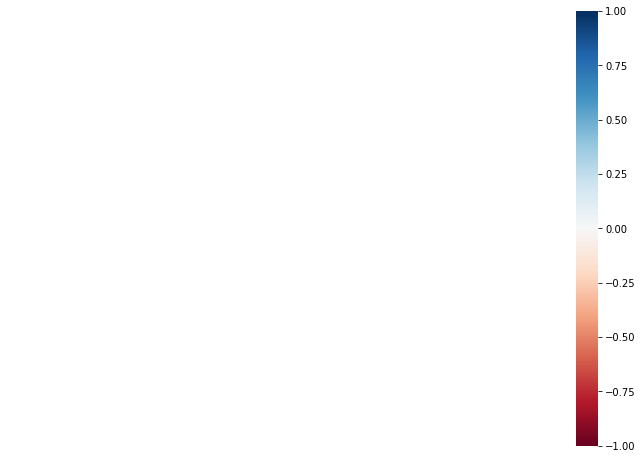

In [30]:

missingno.heatmap(c[['Quantity','title']], figsize=(12,8))

In [14]:
import matplotlib.pyplot as plt

In [ ]:
def plot_returns(df, x, y, length=8, width=14, title=""):
    df = df.sort_values(x, ascending=False)
    plt.figure(figsize=(width, length))
    chart = sns.barplot(data=df, x=x, y=y)
    plt.title(title + "\n", fontsize=16)
    return chart



In [275]:
def acquire (path: str):
    db_connection = create_engine(f'sqlite:///{path}', poolclass=StaticPool)
    data_table = pd.read_sql_query('SELECT country_info.uuid,\
                                    country_info.country_code,\
                                    country_info.rural as habitat,\
                                    career_info.dem_education_level as education_level,\
                                    career_info.normalized_job_code as normalized_job_code,\
                                    personal_info.gender,\
                                    personal_info.age,\
                                    personal_info.age_group,\
                                    poll_info.question_bbi_2016wave4_basicincome_vote as votes_u,\
                                    poll_info.question_bbi_2016wave4_basicincome_argumentsfor as arguments_for,\
                                    poll_info.question_bbi_2016wave4_basicincome_argumentsagainst as arguments_against\
                                    from country_info\
                                    join career_info \
                                    on country_info.uuid = career_info.uuid \
                                    join personal_info \
                                    on career_info.uuid = personal_info.uuid \
                                    join poll_info \
                                    on personal_info.uuid = poll_info.uuid', con=db_connection)
    return data_table

In [465]:
data_table=acquire('./raw_data_project_m1.db')

data_table

,uuid,country_code,habitat,education_level,normalized_job_code,gender,age,age_group,votes_u,arguments_for,arguments_against
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside,no,None,male,61 years old,40_65,I would not vote,None of the above,None of the above
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban,high,861a9b9151e11362eb3c77ca914172d0,male,57 years old,40_65,I would probably vote for it,It increases appreciation for household work a...,It might encourage people to stop working
2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city,None,None,male,32 years old,26_39,I would not vote,It creates more equality of opportunity,Foreigners might come to my country and take a...
3,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,Country,high,049a3f3a2b5f85cb2971ba77ad66e10c,Male,45 years old,40_65,I would probably vote for it,It reduces anxiety about financing basic needs,None of the above
4,24954a70-db98-0133-4a64-0a81e8b09a82,AT,city,high,f4b2fb1aa40f661488e2782b6d57ad2f,Fem,41 years old,40_65,I would probably vote for it,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...
...,...,...,...,...,...,...,...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,SK,urban,high,847165cfda6b1dc82ae22b967da8af2f,FeMale,37 years old,26_39,I would probably vote for it,It reduces bureaucracy and administrative expe...,It is impossible to finance
9645,39f989f0-db52-0133-8482-0a81e8b09a82,SK,urban,high,a4d5b8b38f9513825d0d94a981ebe962,Male,53 years old,40_65,I would probably vote against it,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,SK,Non-Rural,low,None,male,1992,juvenile,I would not vote,It reduces anxiety about financing basic needs,None of the above
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,SK,city,low,775190277a849cba701b306a7b374c0a,male,47 years old,40_65,I would vote for it,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...


In [375]:
data_table['votes_u'].unique()

array(['I would not vote', 'I would probably vote for it',
       'I would vote against it', 'I would vote for it',
       'I would probably vote against it'], dtype=object)

In [376]:
data_table['votes']=data_table['votes_u']

In [377]:
data_table['votes']=data_table['votes'].str.replace('I would probably vote for it','In favour').str.replace('I would vote for it','In favour')
data_table['votes']=data_table['votes'].str.replace('I would probably vote against it','Against').str.replace('I would vote against it','Against')

In [350]:
def arguments_filter(data_table):
    if data_table =='None of the above':
        return np.nan
 
  
   

In [467]:
data_table['arguments_pos']=data_table['arguments_for'].apply(lambda x: re.sub('None of the above','',x)).apply(lambda x: re.split('[|]',x)).apply(lambda x: len(x))
#data_table['arguments_pos_dos']= data_table['arguments_pos'].replace(r'', np.nan, regex=True)
                                                      # .apply(lambda x: None if x is 'None' else str(x)) #.apply(lambda x: re.split(('[|]'),x))
                                                       


#if '[' in x == False

#data_table['arguments_neg']=data_table['arguments_against'].apply(arguments_filter)

data_table



,uuid,country_code,habitat,education_level,normalized_job_code,gender,age,age_group,votes_u,arguments_for,arguments_against,arguments_pos
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside,no,None,male,61 years old,40_65,I would not vote,None of the above,None of the above,1
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban,high,861a9b9151e11362eb3c77ca914172d0,male,57 years old,40_65,I would probably vote for it,It increases appreciation for household work a...,It might encourage people to stop working,3
2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city,None,None,male,32 years old,26_39,I would not vote,It creates more equality of opportunity,Foreigners might come to my country and take a...,1
3,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,Country,high,049a3f3a2b5f85cb2971ba77ad66e10c,Male,45 years old,40_65,I would probably vote for it,It reduces anxiety about financing basic needs,None of the above,1
4,24954a70-db98-0133-4a64-0a81e8b09a82,AT,city,high,f4b2fb1aa40f661488e2782b6d57ad2f,Fem,41 years old,40_65,I would probably vote for it,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,SK,urban,high,847165cfda6b1dc82ae22b967da8af2f,FeMale,37 years old,26_39,I would probably vote for it,It reduces bureaucracy and administrative expe...,It is impossible to finance,1
9645,39f989f0-db52-0133-8482-0a81e8b09a82,SK,urban,high,a4d5b8b38f9513825d0d94a981ebe962,Male,53 years old,40_65,I would probably vote against it,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,1
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,SK,Non-Rural,low,None,male,1992,juvenile,I would not vote,It reduces anxiety about financing basic needs,None of the above,1
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,SK,city,low,775190277a849cba701b306a7b374c0a,male,47 years old,40_65,I would vote for it,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,5


In [233]:
xxx=data_table[['votes', 'arguments_pos','arguments_neg']].groupby(['votes']).sum().reset_index()

xxx=xxx[xxx['votes']!='I would not vote']

xxx= xxx.rename({2:1}, axis='index')

#data_table['arguments_pos'].values.sum()
#data_table['arguments_neg'].values.sum()

#group_data = data_table[['votes', 'arguments_pos', 'arguments_neg']].groupby(['votes'])


#data_table[['votes','arguments_for']].groupby(['arguments_pos']).sum()
xxx

,votes,arguments_pos,arguments_neg
0,Against,1438.0,2276.0
1,In favour,5625.0,5485.0


In [146]:
group_data

,votes,arguments_pos,arguments_neg
0,I would not vote,1159,1159
1,I would probably vote against it,1439,1439
2,I would probably vote for it,3272,3272
3,I would vote against it,960,960
4,I would vote for it,2819,2819


In [82]:
cc

0       False
1        True
2        True
3        True
4        True
        ...  
9644     True
9645     True
9646     True
9647     True
9648     True
Name: arguments_for, Length: 9649, dtype: bool

array(['no', 'high', None, 'medium', 'low'], dtype=object)

In [279]:
data_table['education_level']=data_table['education_level'].str.replace('no','none')


In [283]:
data_table['education_level'].unique()

array(['none', 'high', None, 'medium', 'low'], dtype=object)

In [287]:
data_table['education_level'].replace('None', 'none', inplace=True)

data_table['education_level'].unique()

array(['none', 'high', None, 'medium', 'low'], dtype=object)

In [265]:
jobs_id_list =[]
codelist_df = data_table['job_code'].unique().tolist()
    
for job_code in codelist_df:
    req= requests.get(f'http://api.dataatwork.org/v1/jobs/{job_code}')
    jobs_id_list.append(req.json())
    
jobs_id_list 

[{'error': {'code': 404, 'message': 'Cannot find job with id None'}},
 {'uuid': '861a9b9151e11362eb3c77ca914172d0',
  'title': 'Automatic Data Processing Planner',
  'normalized_job_title': 'automatic data processing planner',
  'parent_uuid': '0148f61d4227497728ce33490843d056'},
 {'error': {'code': 404, 'message': 'Cannot find job with id None'}},
 {'uuid': '049a3f3a2b5f85cb2971ba77ad66e10c',
  'title': 'Data Coordinator',
  'normalized_job_title': 'data coordinator',
  'parent_uuid': '0b9dd32a367f4562ec77b993053d1910'},
 {'uuid': 'f4b2fb1aa40f661488e2782b6d57ad2f',
  'title': 'Database Developer',
  'normalized_job_title': 'database developer',
  'parent_uuid': 'b90ca4df5690002377a7b0f1f3d40781'},
 {'uuid': '27af8700f5577cec835acee2cb90a2ff',
  'title': 'Data Entry Specialist',
  'normalized_job_title': 'data entry specialist',
  'parent_uuid': 'bf88358c56bb6cbe7eabec38ae333d19'},
 {'uuid': 'c1b670eba9ccb65e7c99f7da116d5b9c',
  'title': 'Database Architect',
  'normalized_job_title':

In [270]:
my_json_string = json.dumps(jobs_id_list)

data_jobs=pd.read_json(my_json_string)

In [272]:
data_jobs['normalized_job_code']=data_jobs['uuid']

clean_data_jobs=data_jobs.drop(columns=['error', 'uuid', 'parent_uuid'])

clean_data_jobs

,title,normalized_job_title,normalized_job_code
0,NaN,NaN,NaN
1,Automatic Data Processing Planner,automatic data processing planner,861a9b9151e11362eb3c77ca914172d0
2,NaN,NaN,NaN
3,Data Coordinator,data coordinator,049a3f3a2b5f85cb2971ba77ad66e10c
4,Database Developer,database developer,f4b2fb1aa40f661488e2782b6d57ad2f
...,...,...,...
153,Data Analysis Assistant,data analysis assistant,559a21f836c93876f31b60e6d10656a7
154,Data Examination Clerk,data examination clerk,c1fb1a01b78373ac2153c66fa08d16dc
155,Data Entry Clerk,data entry clerk,05bb9a333a66d6eb151e253623efe1c0
156,Database Programmer,database programmer,a50d1f4be063829950e6ddb02c91379f


In [278]:
result = pd.merge(data_table, clean_data_jobs, how='left', on=['normalized_job_code'])

result[]

,uuid,country_code,habitat,education_level,normalized_job_code,gender,age,age_group,votes_u,arguments_for,arguments_against,title,normalized_job_title
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside,no,None,male,61 years old,40_65,I would not vote,None of the above,None of the above,NaN,NaN
1,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside,no,None,male,61 years old,40_65,I would not vote,None of the above,None of the above,NaN,NaN
2,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban,high,861a9b9151e11362eb3c77ca914172d0,male,57 years old,40_65,I would probably vote for it,It increases appreciation for household work a...,It might encourage people to stop working,Automatic Data Processing Planner,automatic data processing planner
3,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city,None,None,male,32 years old,26_39,I would not vote,It creates more equality of opportunity,Foreigners might come to my country and take a...,NaN,NaN
4,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city,None,None,male,32 years old,26_39,I would not vote,It creates more equality of opportunity,Foreigners might come to my country and take a...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13591,39f989f0-db52-0133-8482-0a81e8b09a82,SK,urban,high,a4d5b8b38f9513825d0d94a981ebe962,Male,53 years old,40_65,I would probably vote against it,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,Database Manager,database manager
13592,70ce4a90-d965-0133-f5e4-0a81e8b09a82,SK,Non-Rural,low,None,male,1992,juvenile,I would not vote,It reduces anxiety about financing basic needs,None of the above,NaN,NaN
13593,70ce4a90-d965-0133-f5e4-0a81e8b09a82,SK,Non-Rural,low,None,male,1992,juvenile,I would not vote,It reduces anxiety about financing basic needs,None of the above,NaN,NaN
13594,2896e440-db3c-0133-5b67-0a81e8b09a82,SK,city,low,775190277a849cba701b306a7b374c0a,male,47 years old,40_65,I would vote for it,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,Data Officer,data officer
